In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank_deets_final.csv")

In [4]:
df

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
1,1,37,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
2,2,40,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
3,3,56,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
4,4,59,139,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,30483,73,334,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1
30484,30484,46,383,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,0
30485,30485,56,189,2,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,0
30486,30486,44,442,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("y_yes", axis=1)
y = df["y_yes"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [14]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    print('\n')
    plot_confusion_matrix(model, X_test, y_test)
    
   

In [15]:
from sklearn.svm import SVC


In [16]:
model = SVC(class_weight="balanced",degree=2)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8001
           1       0.44      0.87      0.58      1146

    accuracy                           0.85      9147
   macro avg       0.71      0.85      0.74      9147
weighted avg       0.91      0.85      0.86      9147





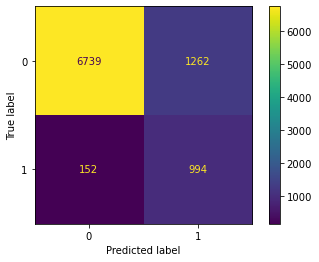

In [17]:
run_model(model,X_train,y_train,X_test,y_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8001
           1       0.52      0.52      0.52      1146

    accuracy                           0.88      9147
   macro avg       0.73      0.73      0.73      9147
weighted avg       0.88      0.88      0.88      9147





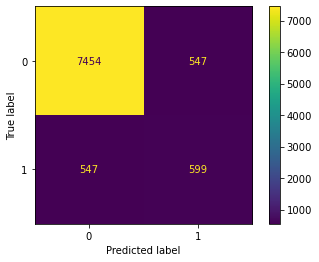

In [20]:
run_model(model,X_train,y_train,X_test,y_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
#help(RandomForestClassifier)

In [28]:
list(range(10,110,10))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8001
           1       0.64      0.43      0.51      1146

    accuracy                           0.90      9147
   macro avg       0.78      0.70      0.73      9147
weighted avg       0.89      0.90      0.89      9147



              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8001
           1       0.64      0.46      0.54      1146

    accuracy                           0.90      9147
   macro avg       0.79      0.71      0.74      9147
weighted avg       0.89      0.90      0.89      9147



              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8001
           1       0.64      0.45      0.53      1146

    accuracy                           0.90      9147
   macro avg       0.78      0.71      0.74      9147
weighted avg       0.89      0.90      0.89      9147



             

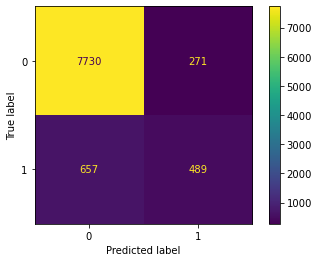

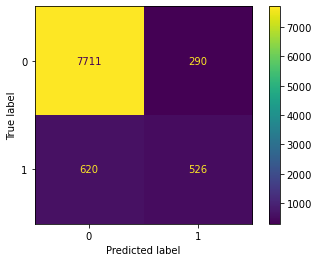

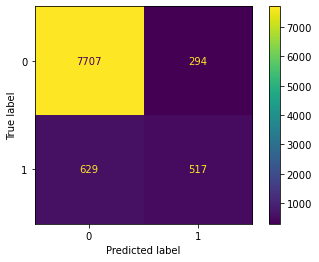

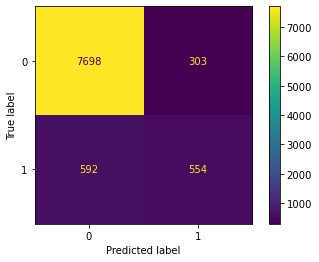

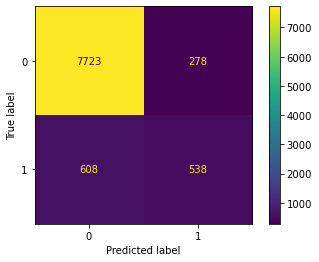

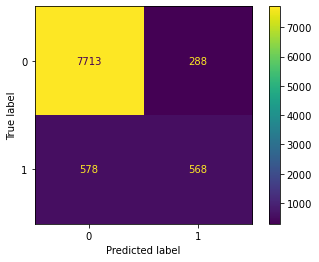

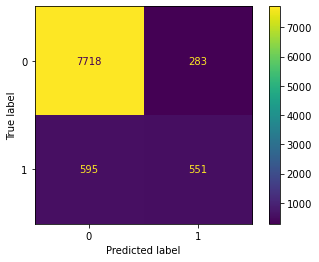

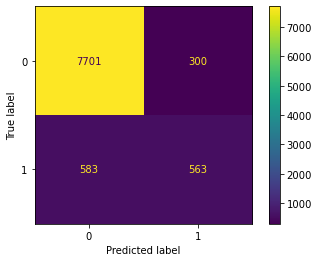

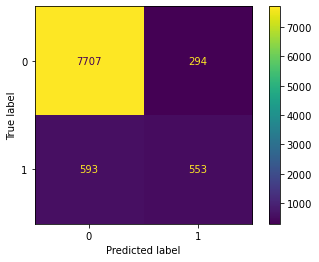

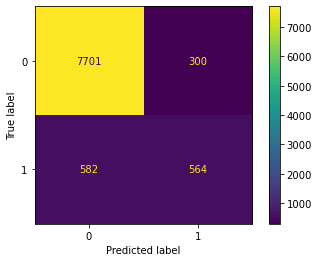

In [29]:
trees = list(range(10,110,10))
for n in trees:
    
    model = RandomForestClassifier(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
model = GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8001
           1       0.66      0.56      0.61      1146

    accuracy                           0.91      9147
   macro avg       0.80      0.76      0.78      9147
weighted avg       0.90      0.91      0.91      9147





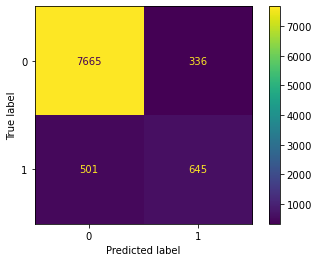

In [32]:
run_model(model,X_train,y_train,X_test,y_test)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
model = AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8001
           1       0.67      0.43      0.52      1146

    accuracy                           0.90      9147
   macro avg       0.80      0.70      0.73      9147
weighted avg       0.89      0.90      0.89      9147





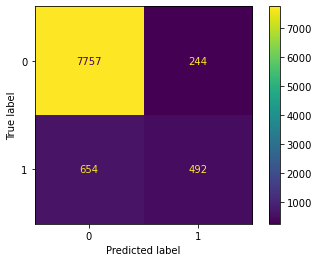

In [35]:
run_model(model,X_train,y_train,X_test,y_test)